In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
%matplotlib inline
%config Completer.use_jedi = False
import os
import joblib

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Config option `use_jedi` not recognized by `IPCompleter`.
  


In [ ]:
X = joblib.load('/content/drive/MyDrive/minor_rnn/X')
y = joblib.load('/content/drive/MyDrive/minor_rnn/y')
X.shape, y.shape 

((8584, 80, 3), (8584,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, 
                                                    stratify = y)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = keras.Sequential()

model.add(layers.Convolution1D(32, (3), activation='relu', input_shape=(80, 3), padding='same'))
#model.summary()
model.add(layers.Convolution1D(64, (5), activation='relu', padding='same'))

model.add(layers.Dense(32))
model.add(layers.LSTM(128, return_sequences=True,input_shape=(80, 32),dropout=0.1))
model.add(layers.SimpleRNN(128,dropout=0.1))
model.add(layers.Dense(32))

model.add(layers.Dense(6,activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 80, 32)            320       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 80, 64)            10304     
_________________________________________________________________
dense (Dense)                (None, 80, 32)            2080      
_________________________________________________________________
lstm (LSTM)                  (None, 80, 128)           82432     
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 1

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) 

In [ ]:
history = model.fit(X_train,y_train, epochs=70, validation_data=(X_test,y_test))

Epoch 1/70
215/215 [==============================] - 53s 85ms/step - loss: 0.8246 - accuracy: 0.7051 - val_loss: 0.6017 - val_accuracy: 0.7839
Epoch 2/70
215/215 [==============================] - 18s 83ms/step - loss: 0.5427 - accuracy: 0.7990 - val_loss: 0.5156 - val_accuracy: 0.8113
Epoch 3/70
215/215 [==============================] - 18s 82ms/step - loss: 0.4153 - accuracy: 0.8413 - val_loss: 0.4373 - val_accuracy: 0.8206
Epoch 4/70
215/215 [==============================] - 18s 83ms/step - loss: 0.3674 - accuracy: 0.8607 - val_loss: 0.3086 - val_accuracy: 0.8853
Epoch 5/70
215/215 [==============================] - 18s 82ms/step - loss: 0.2851 - accuracy: 0.8952 - val_loss: 0.2934 - val_accuracy: 0.8963
Epoch 6/70
215/215 [==============================] - 18s 82ms/step - loss: 0.2398 - accuracy: 0.9102 - val_loss: 0.2290 - val_accuracy: 0.9138
Epoch 7/70
215/215 [==============================] - 18s 84ms/step - loss: 0.1897 - accuracy: 0.9314 - val_loss: 0.1733 - val_accuracy:

In [ ]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
    epoch_range = range(1, epochs+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

      # Plot training & validation loss values
    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show() 

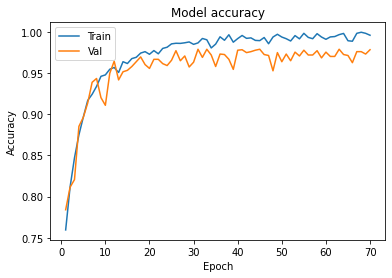

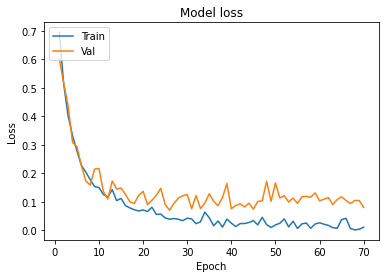

In [ ]:
plot_learningCurve(history, 70) 

In [ ]:
y_pred = model.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix 

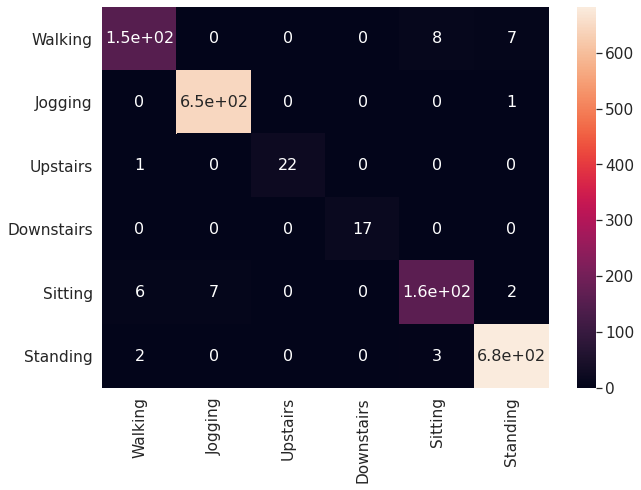

In [ ]:
index = ['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing']
mat = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(mat, index, index)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show() 

In [ ]:
acc_by_class = mat.diagonal()/mat.sum(axis=1)

In [ ]:
for i in range(6):
  print(index[i]+" : "+str(acc_by_class[i])) 

Walking : 0.9101796407185628
Jogging : 0.9984544049459042
Upstairs : 0.9565217391304348
Downstairs : 1.0
Sitting : 0.9147727272727273
Standing : 0.992721979621543
